In [61]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [78]:
import numpy as np
from numpy import fft,pi
import scipy.signal

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import ps_utils_new
import imp
imp.reload(ps_utils_new)

<module 'ps_utils_new' from '/Users/abrahamn/21cmIR/21cmIRxcor/ps_utils_new.pyc'>

In [63]:
matplotlib.rcParams.update({'font.size': 18})
plt.rc('font', family='Arial')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [64]:
analysis_root = '/volumes/abraham/xcor_data/analysis/two_night_comparison/'
analysis_names = ['night1','night2']

In [65]:
ir_images = [ps_utils_new.IRImage(analysis_root+analysis_name+'_mask_artifacts_sources_coarse.fits',run_poly_fit=False,dont_crop=True) for analysis_name in analysis_names] # mask artifacts and sources
ir_images_polyfit = [ps_utils_new.IRImage(analysis_root+analysis_name+'_mask_artifacts_sources_coarse.fits',run_poly_fit=True,dont_crop=True) for analysis_name in analysis_names] # mask artifacts and sources

loading /volumes/abraham/xcor_data/analysis/two_night_comparison/night1_mask_artifacts_sources_coarse.fits
loading /volumes/abraham/xcor_data/analysis/two_night_comparison/night2_mask_artifacts_sources_coarse.fits
loading /volumes/abraham/xcor_data/analysis/two_night_comparison/night1_mask_artifacts_sources_coarse.fits
bg = 302.369
[(292.36898803710938, 312.36898803710938), (-0.1, 0.1), (-0.1, 0.1), (-0.3, 0.3), (-0.5, 0.5), (-0.1, 0.1), (-0.1, 0.1), (-0.3, 0.3), (-0.5, 0.5)]
[  3.03070977e+02   2.38648232e-02  -6.79648597e-03  -9.01626952e-04
   1.64044235e-02   2.10816427e-03  -2.52872455e-02   1.71543998e-02
   5.65046084e-02]
loading /volumes/abraham/xcor_data/analysis/two_night_comparison/night2_mask_artifacts_sources_coarse.fits
bg = 346.359
[(336.3590087890625, 356.3590087890625), (-0.1, 0.1), (-0.1, 0.1), (-0.3, 0.3), (-0.5, 0.5), (-0.1, 0.1), (-0.1, 0.1), (-0.3, 0.3), (-0.5, 0.5)]
[  3.46718783e+02   8.42333769e-04  -3.45166075e-05  -1.83317396e-02
  -1.03600560e-02   1.021873

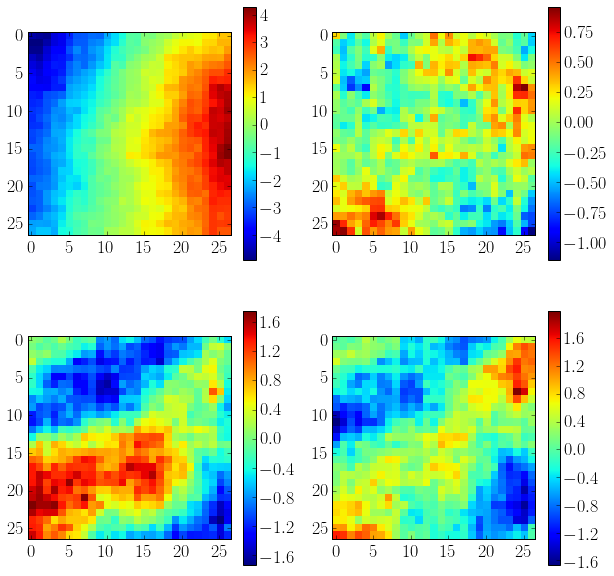

In [76]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(ir_images_polyfit[0].frame_rawADU-np.mean(ir_images_polyfit[0].frame_rawADU),interpolation='nearest')
plt.colorbar()

plt.subplot(222)
plt.imshow(ir_images_polyfit[0].frame_rawADU-ir_images_polyfit[0].model_frame_rawADU,interpolation='nearest')
plt.colorbar()

plt.subplot(223)
plt.imshow(ir_images_polyfit[1].frame_rawADU-np.mean(ir_images_polyfit[1].frame_rawADU),interpolation='nearest')
plt.colorbar()

plt.subplot(224)
plt.imshow(ir_images_polyfit[1].frame_rawADU-ir_images_polyfit[1].model_frame_rawADU,interpolation='nearest')
plt.colorbar()

In [94]:
nbins = 3
lmax = 2300
lmin = 150

lbincenters,xspec,pspec1,pspec2,bin_counts = ps_utils_new.ir_and_ir_full_xspec(ir_images_polyfit[0],ir_images_polyfit[1],nbins,lmin,lmax,uselogbins=True)
lbincenters,xspec_flip,pspec1_flip,pspec2_flip,bin_counts_flip = ps_utils_new.ir_and_ir_full_xspec(ir_images_polyfit[0],ir_images_polyfit[1],nbins,lmin,lmax,flip=True,uselogbins=True)

2259.2659061
2259.2659061


(100, 3000)

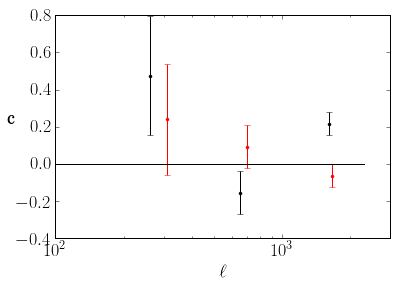

In [95]:
matplotlib.rcParams.update({'font.size': 18})

c = xspec/np.sqrt(pspec1*pspec2)
dc = np.sqrt(.5*(1+c**2)/(bin_counts/4))

c_flip = xspec_flip/np.sqrt(pspec1_flip*pspec2_flip)
dc_flip = np.sqrt(.5*(1+c_flip**2)/(bin_counts_flip/4))

plt.errorbar(lbincenters,c,dc,fmt='k.')
plt.errorbar(lbincenters+50,c_flip,dc_flip,fmt='r.')
plt.xlabel('$\ell$')
plt.ylabel('c',rotation=0)
plt.semilogx([.001,lmax],[0,0],'k-')
plt.xlim([100,3000])

In [86]:
r1 = ir_images_polyfit[0].frame_rawADU-ir_images_polyfit[1].model_frame_rawADU
r2 = ir_images_polyfit[1].frame_rawADU-ir_images_polyfit[1].model_frame_rawADU

np.mean(r1*r2)/(np.std(r1)*np.std(r2))

0.054192051167774764

In [89]:
1./27

0.037037037037037035